In [11]:
!pip install quandl

In [12]:
import pandas as pd
import numpy as np
import quandl, math, datetime
from  sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style 

style.use('ggplot')

df = quandl.get('WIKI/GOOGL')

df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume',]]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [13]:
forecast_col= 'Adj. Close'
df.fillna(-99999, inplace=True)

forecast_out = int(math.ceil(0.1*len(df)))

df['Label'] = df[forecast_col].shift(-forecast_out)

X=np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y=np.array(df['Label'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,y_train)
accuracy = clf.score(X_test, y_test)
forecast_set = clf.predict(X_lately)
print(forecast_set,accuracy, forecast_out)


[ 962.98393891  947.18101665  978.86806707  974.41883871  985.56677237
  977.85477122  984.92768125  986.17915215  976.13265701  974.15074991
 1001.97238025  993.10479285  976.22491112  958.99312574  962.27300573
  978.057189    975.49623269  995.04903597  996.88397444 1016.09906925
 1012.71141999 1028.33043085 1027.70779755 1023.44676359 1013.12940163
 1019.11513474 1018.30370204 1013.23575313 1010.77322483 1010.41275046
 1017.67166744 1006.76514013 1004.30366976  992.58565148 1015.87061028
 1011.50019342 1017.64831749 1039.48293572 1034.67363656 1032.19682498
 1035.86900494 1034.89041322 1039.3328804  1031.84996527 1033.01310668
 1034.16764453 1031.98105915 1061.38430697 1061.75257695 1072.50181022
 1068.61895242 1067.04655484 1031.2218733  1025.00631166 1019.08990296
 1029.1378726  1026.49048397 1024.67051734 1038.47510715 1038.39861268
 1034.9128043  1043.76121243 1049.04133104 1048.58657431 1047.01472023
 1052.24582725 1058.28197831 1061.99274519 1065.50498717 1061.45605369
 1056.

**The forecast_set array represents the data of Closing Price each day in the coming future for 35 days, Accuracy obtained on the testing data is shown with the number of days forecasted.**

In [14]:
df['Forecast']=np.nan 
last_date= df.iloc[-1].name
last_unix = last_date.timestamp()
one_day=86400
next_unix = last_unix + one_day

for i in forecast_set:
	next_date = datetime.datetime.fromtimestamp(next_unix)
	next_unix += one_day
	df.loc[next_date] = [ np.nan for _ in range(len(df.columns)-1)] + [i]

print (df.tail())

#fully accurate forecasting code

            Adj. Close  HL_PCT  PCT_change  Adj. Volume  Label     Forecast
Date                                                                       
2017-10-15         NaN     NaN         NaN          NaN    NaN  1374.781679
2017-10-16         NaN     NaN         NaN          NaN    NaN  1323.191438
2017-10-17         NaN     NaN         NaN          NaN    NaN  1302.095760
2017-10-18         NaN     NaN         NaN          NaN    NaN  1316.759082
2017-10-19         NaN     NaN         NaN          NaN    NaN  1277.539783


The last 5 days of forecasted data.

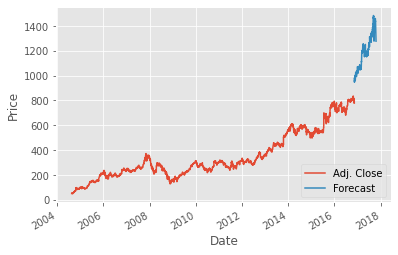

In [15]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
